In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
img=cv2.imread('cameraman.png',0)
img.shape

(256, 256)

In [16]:
#img[1,1,:]

In [17]:
#img[:,:,0].shape

In [7]:
cv2.imshow('im1',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# Image Enhancement
# Brightness improvement
im1=img+100
cv2.imshow('im1',im1)
cv2.waitKey(0)
cv2.destroyAllWindows()
im1[0,0]

0

In [20]:
img[0,0]

156

In [21]:
img.dtype

dtype('uint8')

In [23]:
img1=img.astype('float')

In [26]:
img1[0,0]

156.0

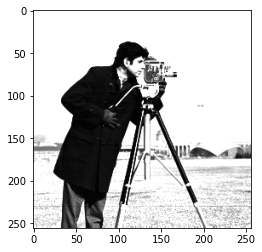

In [35]:
im2=1.2*img1+100
#im2[0,0]
im2[im2>255]=255
# cv2.imshow('im',im2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(im2,cmap='gray')

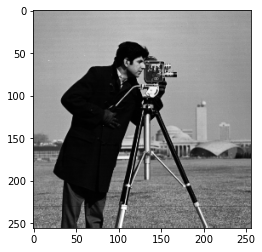

In [30]:
plt.imshow(img1,cmap='gray')

In [41]:
# im3=im2/255.
# plt.imshow(im3,cmap='gray')

In [42]:
imgn=img1/255

In [46]:
im_nl=np.exp(-1*imgn)
cv2.imshow('im1',im_nl)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
im_log=5*np.log(imgn+1)
cv2.imshow('im1',im_log)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
fruit=cv2.imread('low_contrast_fruit_basket.jpg',0)
cv2.imshow('im1',fruit)
cv2.waitKey(0)
cv2.destroyAllWindows()

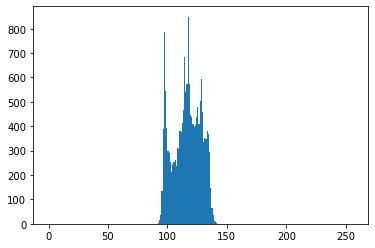

In [53]:
plt.hist(fruit.ravel(),256,[0,256])
plt.show()

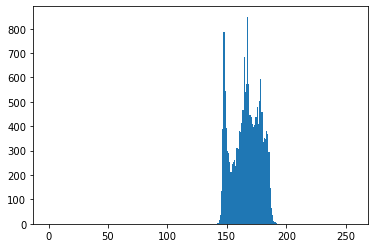

In [54]:
plt.hist((fruit+50).ravel(),256,[0,256])
plt.show()

In [60]:
# Histogram Equalization
im_eq=cv2.equalizeHist(fruit)
ahe=cv2.createCLAHE(clipLimit=10.0,tileGridSize=(4,4))
im_ahe=ahe.apply(fruit)

res=np.hstack((fruit,im_eq,im_ahe))
cv2.imshow('im1',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

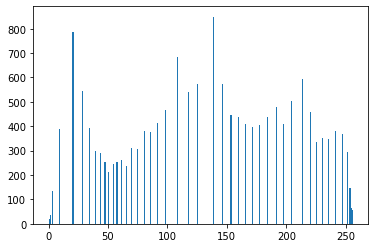

In [58]:
plt.hist(im_eq.ravel(),256,[0,256])
plt.show()

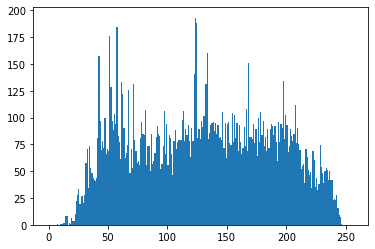

In [59]:
plt.hist(im_ahe.ravel(),256,[0,256])
plt.show()

In [63]:
img=cv2.imread('ballons.bmp')
img.shape

(194, 250, 3)

In [64]:
img[0,0,:]

array([ 83,  79, 235], dtype=uint8)

In [70]:
imgb=img[:,:,0]

img1=img.copy()
img1[:,:,0]=0
img1[:,:,1]=0
img1.shape

(194, 250, 3)

In [71]:
cv2.imshow('im1',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [81]:
#Noise Processing - Filter
img=cv2.imread('noisy_lung.jpg',0)

kernal=np.ones((5,5),dtype='float')/25

filt=cv2.filter2D(img,-1,kernal)

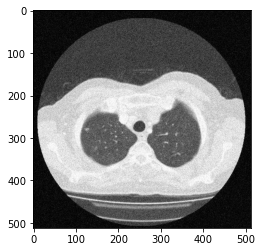

In [82]:
plt.imshow(img,cmap='gray')

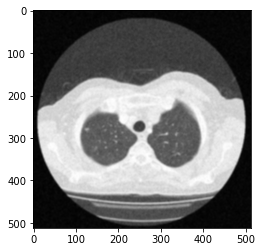

In [83]:
plt.imshow(filt,cmap='gray')

In [90]:
#Noise Processing - Filter
img=cv2.imread('3_nod.jpg',0)

kernal=np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')

filt=cv2.filter2D(img,-1,kernal)
filt=filt*3

In [91]:
kernal

matrix([[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]])

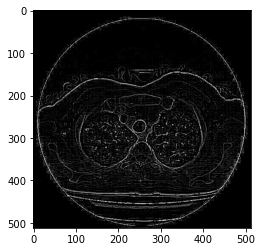

In [92]:
plt.imshow(filt,cmap='gray')

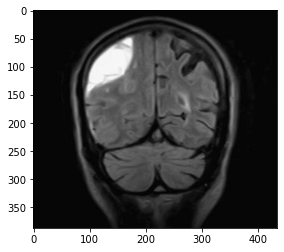

In [93]:
#Segmentation
img=cv2.imread('mri_tumor1.jpg',0)
plt.imshow(img,cmap='gray')

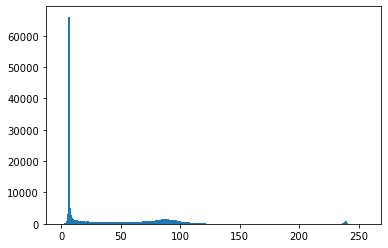

In [94]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [101]:
img=cv2.imread('mri_tumor1.jpg',0)
img[img>130]=255
img[img<=130]=0
cv2.imshow('im',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

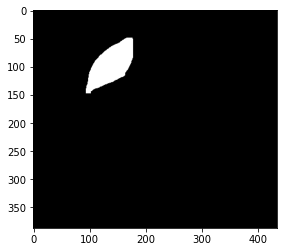

In [106]:
se1=cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
mask=cv2.morphologyEx(img,cv2.MORPH_OPEN,se1)
plt.imshow(mask,'gray')

In [109]:
#Feature Extraction
#Area
ar=(mask!=0).sum()
ar

4551

In [107]:
mask!=0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [115]:
#Max Height
max_h=(mask!=0).sum(axis=0).max()

In [116]:
#Max Width
max_w=(mask!=0).sum(axis=1).max()
max_w

67

In [117]:
# Eccentricity
ecc=max_h/max_w
ecc

0.9850746268656716

In [121]:
#Perimeter
kernal=np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')

filt=cv2.filter2D(mask,-1,kernal)
filt=filt*3

peri=(filt!=0).sum()
peri

362

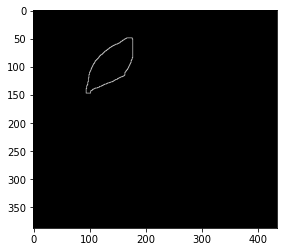

In [120]:
plt.imshow(filt,cmap='gray')

In [124]:
# Centroid
m=cv2.moments(mask)
m
x_cent=np.round(m['m10']/m['m00'])
y_cent=np.round(m['m01']/m['m00'])
print(x_cent,y_cent)

138.0 97.0


In [127]:
im2,contours,hier=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours[0].shape

(262, 1, 2)

In [128]:
cnt=contours[0]
cnt_area=cv2.contourArea(cnt)
cnt_area

4419.0

In [131]:
hull=cv2.convexHull(cnt)
hull_area=cv2.contourArea(hull)
hull_area

4611.0

In [135]:
(x,y),radius=cv2.minEnclosingCircle(cnt)
rad=np.round(radius)
rad

64.0

In [136]:
np.array([ar,max_h,max_w,ecc,peri,x_cent,y_cent,cnt_area,hull_area,rad])

array([4.55100000e+03, 6.60000000e+01, 6.70000000e+01, 9.85074627e-01,
       3.62000000e+02, 1.38000000e+02, 9.70000000e+01, 4.41900000e+03,
       4.61100000e+03, 6.40000000e+01])

In [ ]:
#Say you have 1000 images of tumor, then u can extract 1000x9 dataset

In [137]:
#Texture features- statistical feature (mean, std, skew, all higher order moment)

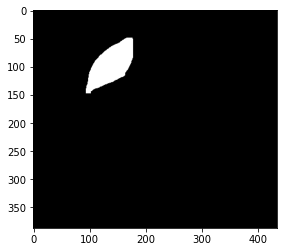

In [139]:
plt.imshow(mask,cmap='gray')

In [141]:
img=cv2.imread('mri_tumor1.jpg',0)
mask=mask/255
mask1=img*mask

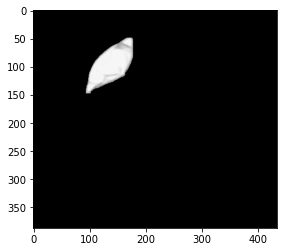

In [143]:
plt.imshow(mask1,cmap='gray')

In [144]:
tum_me=np.mean(mask1[mask1!=0])

In [145]:
tum_me

0.8624555689118101

In [147]:
tum_sd=np.std(mask1[mask1!=0])
tum_sd

0.11366179902789171